### Real Data Analysis

1. Priority is on density estimates so analyze how the model performs on the overall flights (mean density, sd density - summary statistic, boxplot). Look how density estimates (point estimates) change with **area**, number of encounters, between **locations**, **speed**, **animals** perhaps. I can perhaps do an sd for locations. 

2. Summary stats relating to what was seen/flight logistics. A log would be good and it sets parameters for the simulated model but remember - It's about the model!

#### Import Data

* Start total count and species count tables
* Frequency plots

In [8]:
rm(list=ls())

suppressMessages(library(dplyr))
library(tidyr)
library(geosphere)
suppressMessages(library(reshape2))
library(ggplot2)
library(ggthemes)


# Import cleaned datasets from the Data_Wrangling
source('Data_Wrangling.R')

# Import original files for duration 
original_biot <- read.csv("../Data/Metadata/BIOT/BIOT_2018.csv", header = T)
original_biot <- subset(original_biot, original_biot$Flight.or.Grounded == 'Flight') # All images in flight
# Subset by particular flights
original_biot <- original_biot[original_biot$Flight == 1 | original_biot$Flight == 3 | original_biot$Flight == 7 | original_biot$Flight == 8 | original_biot$Flight == 10 | original_biot$Flight == 11 | original_biot$Flight == 12,  ]

In [9]:
# Total counts

biot_sum <- biot_lite %>%
  group_by(Flight) %>% 
  tally(c(Reefshark, Nurseshark, Whaleshark, Eagleray, Mantaray, Whitetern, 
          Sootytern, Tern_other, Redfootedboobie, Frigatebird, Brownnoddy_any, 
          Bird, FruitBat, Human))

belize_sum <- belize_lite %>%
  group_by(Flight) %>% 
  tally(c(eagle.ray,turtle,manatee,shark,ray))


total_count <- rbind(biot_sum, belize_sum)
# Rename Belize flights
total_count[8,1] <- 13
total_count[9,1] <- 14
total_count[10,1] <- 15
total_count[11,1] <- 16
total_count[12,1] <- 17
total_count[13,1] <- 18

total_count

Flight,n
<dbl>,<dbl>
1,4
3,3
7,2
8,5627
10,2
11,2
12,13
13,5
14,2


In [17]:
# Different counts among species

Species_count_biot <- biot_lite %>%
  group_by(Flight) %>% 
  summarise(Reef_shark = sum(Reefshark),
            Nurse_shark = sum(Nurseshark),
            Whale_shark = sum(Whaleshark),
            Eagleray = sum(Eagleray),
            Mantaray = sum(Mantaray),
            White_tern = sum(Whitetern),
            Sooty_tern = sum(Sootytern),
            Tern_other = sum(Tern_other),
            Redfooted_boobie = sum(Redfootedboobie),
            Frigate_bird = sum(Frigatebird),
            Brown_noddy_any = sum(Brownnoddy_any),
            Bird = sum(Bird))

Species_count_belize <- belize_lite %>%
  group_by(Flight) %>% 
  summarise(Eagle_ray = sum(eagle.ray),
            Turtle = sum(turtle), 
            Manatee = sum(manatee),
            Shark = sum(shark),
            Ray  = sum (ray))

Species_count_biot
Species_count_belize

# Do flight 8 on its own or categorize species (megafauna, birds)
# Sharks and rays can be comparable across flights in Belize and BIOT. Birds are different

Flight,Reef_shark,Nurse_shark,Whale_shark,Eagleray,Mantaray,White_tern,Sooty_tern,Tern_other,Redfooted_boobie,Frigate_bird,Brown_noddy_any,Bird
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,0,0,0,0,0,0,0,2,0,0,0
3,1,0,0,0,0,0,0,2,0,0,0,0
7,0,1,0,0,0,1,0,0,0,0,0,0
8,0,6,0,1,0,0,4550,348,525,25,144,28
10,0,0,1,0,1,0,0,0,0,0,0,0
11,0,0,0,1,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0


Flight,Eagle_ray,Turtle,Manatee,Shark,Ray
<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,3,2,0,0,0
2,0,0,0,0,2
3,0,0,2,0,0
4,2,0,0,0,0
5,0,0,2,0,0
6,2,0,0,0,0


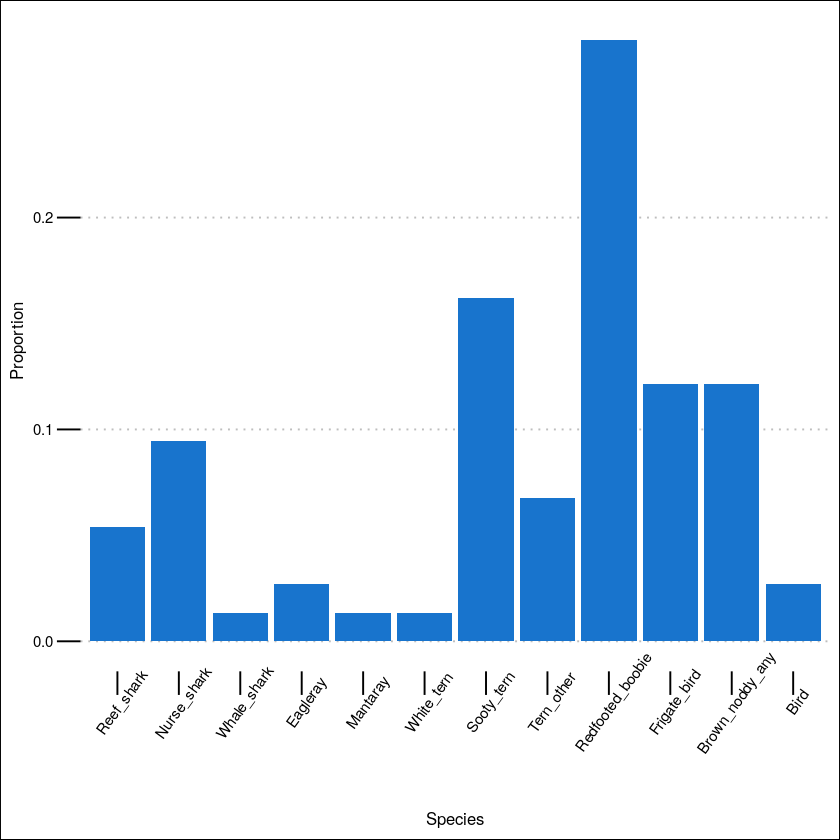

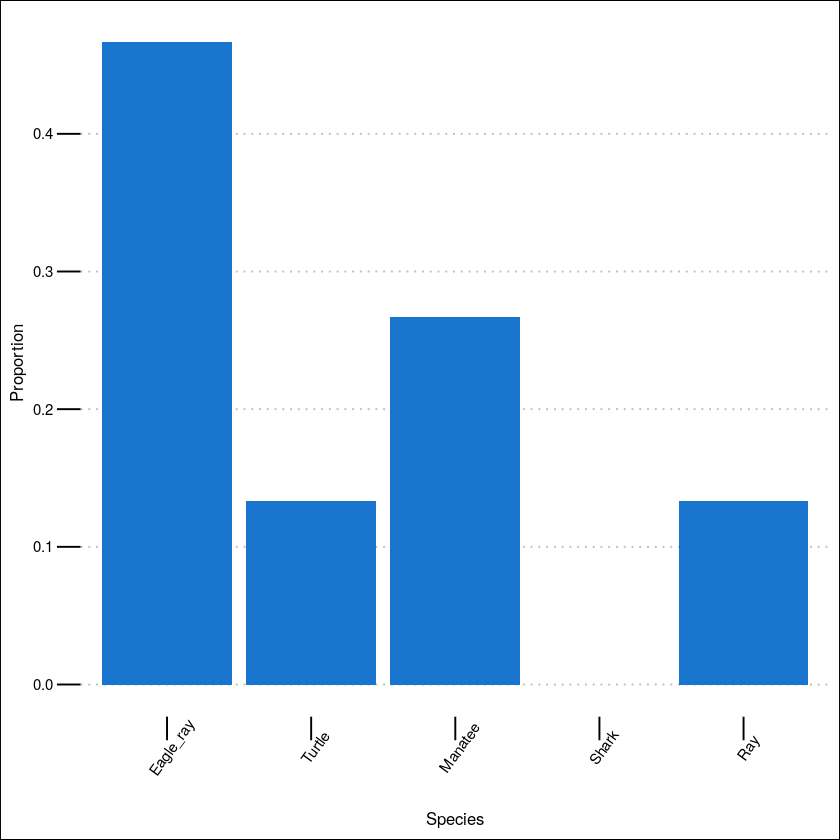

In [30]:
##################### Species Count Barplot ##########################

# Convert all captures to presence/ absent data as the number of individuals does not matter
biot_pa <- biot_lite

columns_to_change <- biot_lite[,c("Reefshark", "Nurseshark", "Whaleshark", "Eagleray", "Mantaray", 
                                  "Whitetern", "Sootytern", "Tern_other", "Redfootedboobie", "Frigatebird", 
                                  "Brownnoddy_any", "Bird")]
cols <- columns_to_change %>% mutate_if(is.numeric, ~1 * (. > 0))
biot_pa[,c("Reefshark", "Nurseshark", "Whaleshark", "Eagleray", "Mantaray", 
                                  "Whitetern", "Sootytern", "Tern_other", "Redfootedboobie", "Frigatebird", 
                                  "Brownnoddy_any", "Bird")] <- cols
#biot_pa <- biot_pa[,-grep("Total", colnames(biot_pa))] # Remove total columns


belize_pa <- belize_lite

bel_cols <- belize_lite[,c("eagle.ray", "turtle", "manatee", "shark", "ray")]
b_cols <- bel_cols %>% mutate_if(is.numeric, ~1 * (. > 0))
belize_pa[,c("eagle.ray", "turtle", "manatee", "shark", "ray")] <-bel_cols



Species_count1 <- biot_pa %>%
  group_by(Flight) %>% 
  summarise(Reef_shark = sum(Reefshark),
            Nurse_shark = sum(Nurseshark),
            Whale_shark = sum(Whaleshark),
            Eagleray = sum(Eagleray),
            Mantaray = sum(Mantaray),
            White_tern = sum(Whitetern),
            Sooty_tern = sum(Sootytern),
            Tern_other = sum(Tern_other),
            Redfooted_boobie = sum(Redfootedboobie),
            Frigate_bird = sum(Frigatebird),
            Brown_noddy_any = sum(Brownnoddy_any),
            Bird = sum(Bird))


Species_count2 <- belize_pa %>%
  group_by(Flight) %>% 
  summarise(Eagle_ray = sum(eagle.ray),
            Turtle = sum(turtle), 
            Manatee = sum(manatee),
            Shark = sum(shark),
            Ray  = sum (ray))


# Transpose dataframe for graphing
sp.bar <- data.frame(t(Species_count1[-1])) # Transpose
colnames(sp.bar) <- unlist(Species_count1[,1]) # Column names = flight.no
sp.bar$Total <- apply(sp.bar, 1, function(x) sum(x)) # Total 
sp.bar$Prop <- lapply(sp.bar$Total, function(x) x/sum(sp.bar$Total))

                      
# Transpose dataframe for graphing
sp.bar_bel <- data.frame(t(Species_count2[-1])) # Transpose
colnames(sp.bar_bel) <- unlist(Species_count2[,1]) # Column names = flight.no
sp.bar_bel$Total <- apply(sp.bar_bel, 1, function(x) sum(x)) # Total 
sp.bar_bel$Prop <- lapply(sp.bar_bel$Total, function(x) x/sum(sp.bar_bel$Total))
                          
#pdf(file = paste("../Results/Frequency.pdf", sep = ""))
#print(ggplot(data = sp.bar, aes(x = rownames(sp.bar), y = Prop)) +
  #geom_bar(stat = "identity", fill = "dodgerblue3") +
  #xlab("Species") +
  #ylab("Proportion") +
  #scale_x_discrete(limits = rownames(sp.bar)) +
  #theme_clean() +
  #theme(axis.text.x = element_text(angle = 50), axis.ticks.length = unit(.5, "cm"))) 

#dev.off()


bar.plot_biot <- ggplot(data = sp.bar, aes(x = rownames(sp.bar), y = Prop)) +
  geom_bar(stat = "identity", fill = "dodgerblue3") +
  xlab("Species") +
  ylab("Proportion") +
  scale_x_discrete(limits = rownames(sp.bar)) +
  theme_clean() +
  theme(axis.text.x = element_text(angle = 54), axis.ticks.length = unit(.5, "cm")) +
  scale_fill_brewer(palette = "Dark2")
                          

bar.plot_bel <- ggplot(data = sp.bar_bel, aes(x = rownames(sp.bar_bel), y = Prop)) +
  geom_bar(stat = "identity", fill = "dodgerblue3") +
  xlab("Species") +
  ylab("Proportion") +
  scale_x_discrete(limits = rownames(sp.bar_bel)) +
  theme_clean() +
  theme(axis.text.x = element_text(angle = 54), axis.ticks.length = unit(.5, "cm")) 
  #scale_fill_brewer(palette = "Dark1")

bar.plot_biot
bar.plot_bel
#rownames(sp.bar_bel)
#sp.bar_bel
#sp.bar

#### Area calculations and Total table

